## Jupyter notebook for comparing exons and introns data of RNA-seq data 
This notebook is the code for comparing exons and introns of RNA-seq data used in the paper "Simultaneous analysis of open chromatin, promoter interactions and gene expression in stimulated T cells implicates causal genes for rheumatoid arthritis" by Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre.

Author : *Jing Yang*  <br />
Date: 24-10-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

### load library for ploting the results

In [1]:
library(ggplot2)

### read exons and introns data for the two replciates

In [2]:
exons_rep1 <- read.table('data/exons_rawreads_rep1.csv', sep=',', header=T)
introns_rep1 <- read.table('data/introns_rawreads_rep1.csv', sep=',', header=T)
exons_rep2 <- read.table('data/exons_rawreads_rep2.csv', sep=',', header=T)
introns_rep2 <- read.table('data/introns_rawreads_rep2.csv', sep=',', header=T)


### merge data

In [3]:
### merge introns and exons data, compare those with both exons and introns data 
data_rep1 <- merge(exons_rep1, introns_rep1)
data_rep2 <- merge(exons_rep2, introns_rep2)

In [4]:
### get gene reads data
gene_rep1 <- cbind(data_rep1[,1],data_rep1[,2:7]+data_rep1[,8:13])
gene_rep2 <- cbind(data_rep2[,1],data_rep2[,2:7]+data_rep2[,8:13])

names(gene_rep1)[1] <- 'ENSG'
names(gene_rep2)[1] <- 'ENSG'
### merge rep1 and rep2 
gene_rep1andrep2 <- merge(gene_rep1, gene_rep2)

### plot the results and show Pearson correlation coefficients 

In [5]:
corr_eqn <- function(x,y, digits = 2) {
  corr_coef <- round(cor(x, y), digits = digits)
  paste("italic(r) == ", corr_coef)
}

### Supplementary Fig. 2a

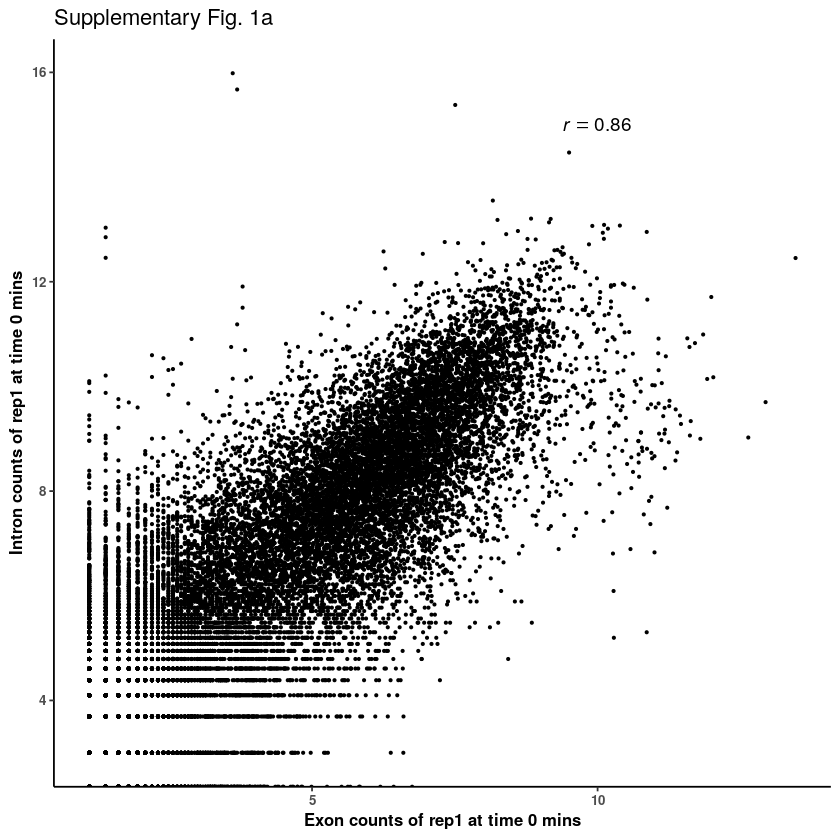

In [6]:
ggplot() + geom_point(data=data_rep1, aes(x=log(data_rep1[,'ET01']+3), y=log(data_rep1[,'IT01'])+3), size=0.5) + 
annotate(geom="text", x=10, y=15, label=corr_eqn(log(as.numeric(data_rep1$ET01)+3), log(as.numeric(data_rep1$IT01)+3)), parse=TRUE, size=4) + 
theme(
  # Remove panel borde
  #panel.border = element_blank(),  
  # Remove panel grid lines
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Remove panel background
  panel.background = element_blank(),
  # Add axis line
  legend.title=element_blank(),
  axis.title=element_text(size=10,face="bold"),
  #plot.title=element_text(size=16,face="bold", hjust=-0.4, vjust=2.2),
  #plot.margin=unit(c(0.2,0,0,1.0),"cm"),

  #axis.text.x = element_text(hjust = 0.5, vjust=0.5, size=8, face="bold"),
  axis.text.x = element_text(size=8, face="bold"),

  axis.text.y = element_text(size=8, face="bold"),
  axis.line = element_line(colour = "black")) +
 xlab('Exon counts of rep1 at time 0 mins') + ylab('Intron counts of rep1 at time 0 mins') + ggtitle('Supplementary Fig. 1a')


#ggsave('~/Dropbox (The University of Manchester)/IntegratingATAC-RNA-HiC/Individual_Figures_Files/Gene_expression/exon_intron_rep1.png',p1, dpi = 600, width=3, height=3, units = "in", device='png' )


### Supplementary Fig. 2b

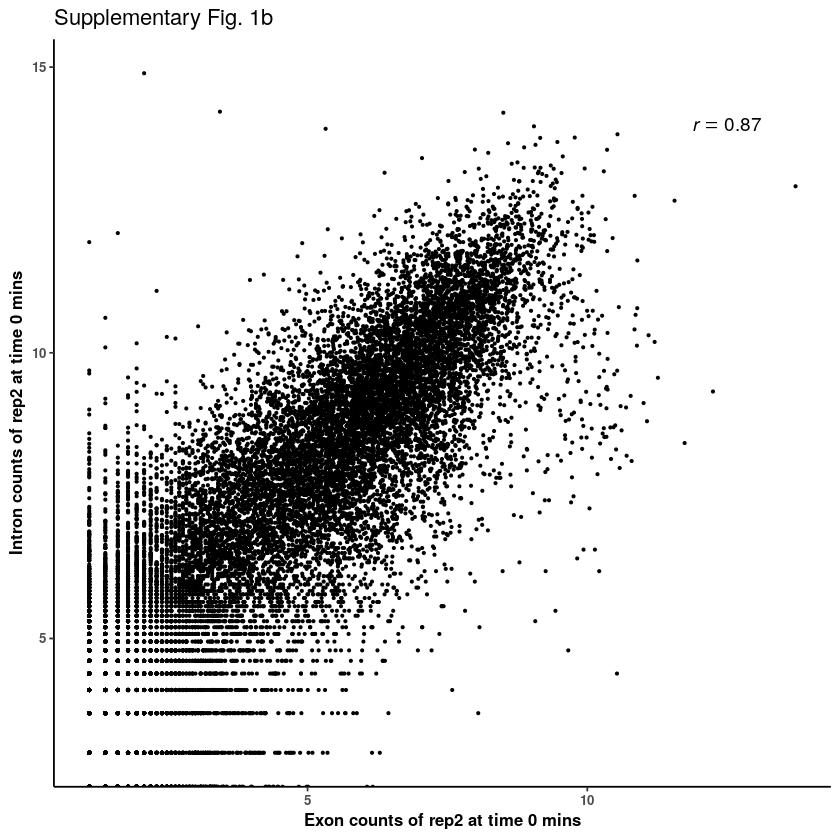

In [7]:
ggplot() + geom_point(data=data_rep2, aes(x=log(data_rep2[,'ET02']+3), y=log(data_rep2[,'IT02'])+3), size=0.5) + 
annotate(geom="text", x=12.5, y=14, label=corr_eqn(log(as.numeric(data_rep2$ET02)+3), log(as.numeric(data_rep2$IT02)+3)), parse=TRUE, size=4) + 
theme(
  # Remove panel borde
  #panel.border = element_blank(),  
  # Remove panel grid lines
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Remove panel background
  panel.background = element_blank(),
  # Add axis line
  legend.title=element_blank(),
  axis.title=element_text(size=10,face="bold"),
  #plot.title=element_text(size=16,face="bold", hjust=-0.4, vjust=2.2),
  #plot.margin=unit(c(0.2,0,0,1.0),"cm"),

  #axis.text.x = element_text(hjust = 0.5, vjust=0.5, size=8, face="bold"),
  axis.text.x = element_text(size=8, face="bold"),

  axis.text.y = element_text(size=8, face="bold"),
  axis.line = element_line(colour = "black")) +
 xlab('Exon counts of rep2 at time 0 mins') + ylab('Intron counts of rep2 at time 0 mins') + ggtitle('Supplementary Fig. 1b')


### Supplementary Fig. 2c

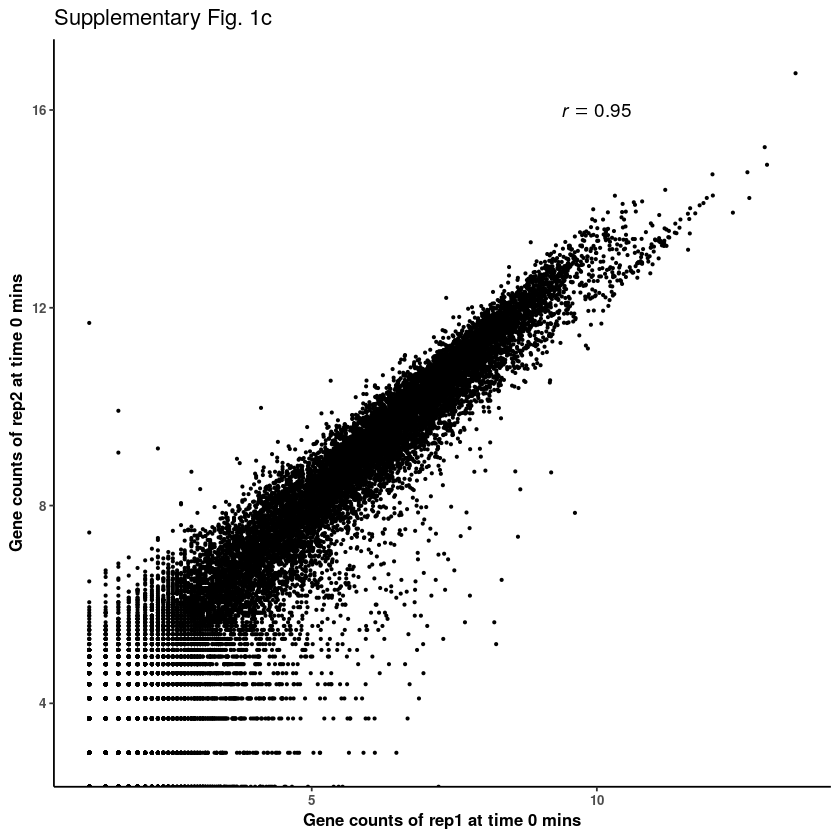

In [8]:
ggplot() + geom_point(data=gene_rep1andrep2, aes(x=log(gene_rep1andrep2[,'ET01']+3), y=log(gene_rep1andrep2[,'ET02'])+3), size=0.5) + 
annotate(geom="text", x=10, y=16, label=corr_eqn(log(as.numeric(gene_rep1andrep2$ET01)+3), log(as.numeric(gene_rep1andrep2$ET02)+3)), parse=TRUE, size=4) + 
theme(
  # Remove panel borde
  #panel.border = element_blank(),  
  # Remove panel grid lines
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Remove panel background
  panel.background = element_blank(),
  # Add axis line
  legend.title=element_blank(),
  axis.title=element_text(size=10,face="bold"),
  #plot.title=element_text(size=16,face="bold", hjust=-0.4, vjust=2.2),
  #plot.margin=unit(c(0.2,0,0,1.0),"cm"),

  #axis.text.x = element_text(hjust = 0.5, vjust=0.5, size=8, face="bold"),
  axis.text.x = element_text(size=8, face="bold"),

  axis.text.y = element_text(size=8, face="bold"),
  axis.line = element_line(colour = "black")) +
 xlab('Gene counts of rep1 at time 0 mins') + ylab('Gene counts of rep2 at time 0 mins') + ggtitle('Supplementary Fig. 1c')

#ggsave('~/Dropbox (The University of Manchester)/IntegratingATAC-RNA-HiC/Individual_Figures_Files/Gene_expression/gene_rep1_rep2.png',p1, dpi = 600, width=3, height=3, units = "in", device='png' )
